In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr

In [2]:
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('/Users/rosmebabyjoseph/Library/Jupyter/data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.index=df['DATE']

In [4]:
df.head(10)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1491226200,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,...,84.3700,119.035,44.40,39.88,82.0300,7.360,50.22,63.86,122.000,53.350
1491226260,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,...,84.3700,119.035,44.11,39.88,82.0300,7.380,50.22,63.74,121.770,53.350
1491226320,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,...,84.5850,119.260,44.09,39.98,82.0200,7.360,50.12,63.75,121.700,53.365
1491226380,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,...,84.4600,119.260,44.25,39.99,82.0200,7.350,50.16,63.88,121.700,53.380
1491226440,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,...,84.4700,119.610,44.11,39.96,82.0300,7.360,50.20,63.91,121.695,53.240
1491226500,1491226500,2365.6201,42.5399,143.7800,130.0700,82.040,102.0400,85.9200,59.610,121.700,...,84.4825,119.580,44.15,39.96,82.0300,7.360,50.20,63.84,121.850,53.220
1491226560,1491226560,2365.2000,42.4700,143.8640,130.1800,82.120,102.3300,85.9120,59.540,121.630,...,84.5000,119.320,44.20,39.98,82.0566,7.365,50.33,63.83,122.100,53.330
1491226620,1491226620,2365.2900,42.4700,143.8100,130.1400,82.190,102.3700,85.8200,59.410,121.610,...,84.5200,119.110,44.12,39.95,82.0000,7.360,50.30,63.83,122.280,53.370
1491226680,1491226680,2364.3201,42.3900,143.8150,130.1000,82.230,102.3800,85.8800,59.430,121.715,...,84.4800,119.310,44.12,39.93,81.9500,7.370,50.25,63.85,121.875,53.330


In [5]:
Stockdata=df[['NASDAQ.AAPL', 'NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']] 

In [6]:
Stockdata.head(10)

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1491226260,143.7000,102.1400,81.21,33.8800,33.3950
1491226320,143.6901,102.2125,81.21,33.9000,33.4100
1491226380,143.6400,102.1400,81.13,33.8499,33.3350
1491226440,143.6600,102.0600,81.12,33.8400,33.4000
1491226500,143.7800,102.0400,81.22,33.8800,33.4300
1491226560,143.8640,102.3300,81.16,33.9000,33.4650
1491226620,143.8100,102.3700,81.16,33.8900,33.5300
1491226680,143.8150,102.3800,81.16,33.9200,33.5650


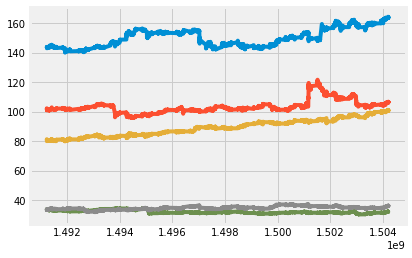

In [7]:
plt.plot(Stockdata)
plt.show()

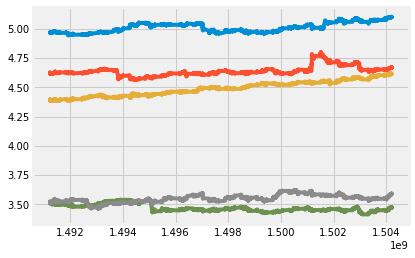

In [8]:
price=np.log(Stockdata)
plt.plot(price)
plt.show()

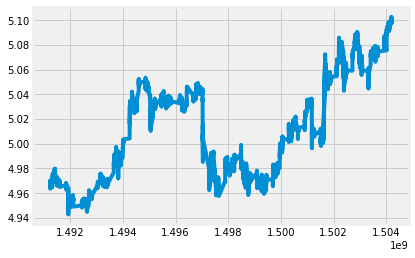

In [9]:
plt.plot(price['NASDAQ.AAPL'])
plt.show()

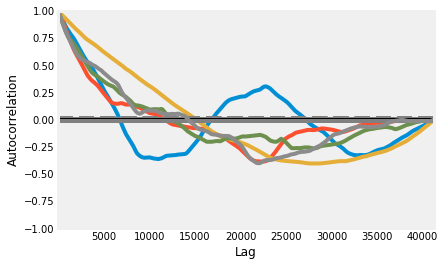

In [10]:
autocorrelation_plot(price['NASDAQ.AAPL'])
autocorrelation_plot(price['NASDAQ.ADP'])
autocorrelation_plot(price['NASDAQ.CBOE'])
autocorrelation_plot(price['NASDAQ.CSCO'])
autocorrelation_plot(price['NASDAQ.EBAY'])

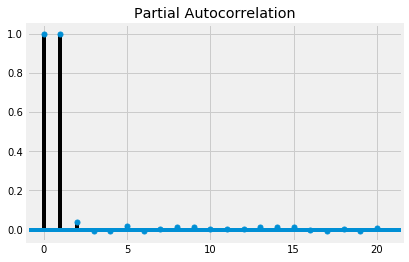

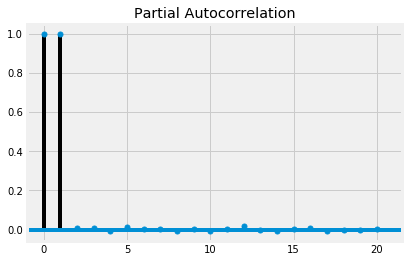

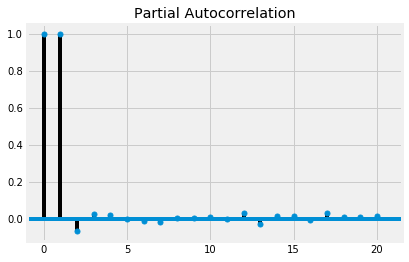

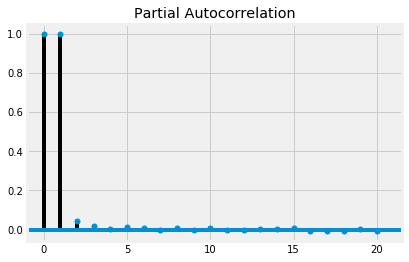

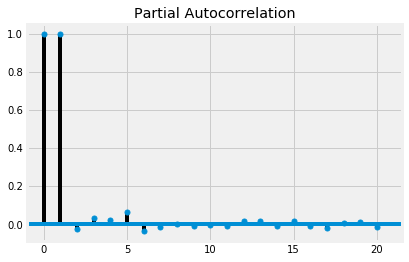

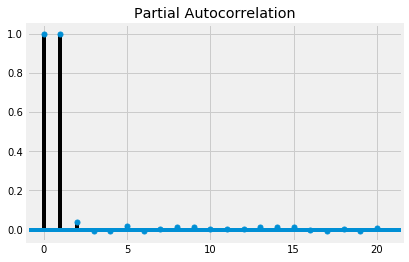

In [11]:
plot_pacf(price['NASDAQ.AAPL'],lags=20)
plot_pacf(price['NASDAQ.ADP'],lags=20)
plot_pacf(price['NASDAQ.CBOE'],lags=20)
plot_pacf(price['NASDAQ.CSCO'],lags=20)
plot_pacf(price['NASDAQ.EBAY'],lags=20)

In [12]:
mean1, mean2 =price['NASDAQ.AAPL'].iloc[:125].mean(), price['NASDAQ.AAPL'].iloc[125:].mean()
var1, var2 = price['NASDAQ.AAPL'].iloc[:125].var(), price['NASDAQ.AAPL'].iloc[125:].var()
print('NASDAQ.AAPL-mean1=%f, mean2=%f' % (mean1, mean2))
print('NASDAQ.AAPL-variance1=%f, variance2=%f' % (var1, var2))
mean1, mean2 =price['NASDAQ.ADP'].iloc[:125].mean(), price['NASDAQ.ADP'].iloc[125:].mean()
var1, var2 = price['NASDAQ.ADP'].iloc[:125].var(), price['NASDAQ.ADP'].iloc[125:].var()
print('NASDAQ.ADP-mean1=%f, mean2=%f' % (mean1, mean2))
print('NASDAQ.ADP-variance1=%f, variance2=%f' % (var1, var2))
mean1, mean2 =price['NASDAQ.CBOE'].iloc[:125].mean(), price['NASDAQ.AAPL'].iloc[125:].mean()
var1, var2 = price['NASDAQ.CBOE'].iloc[:125].var(), price['NASDAQ.AAPL'].iloc[125:].var()
print('NASDAQ.CBOE-mean1=%f, mean2=%f' % (mean1, mean2))
print('NASDAQ.CBOE-variance1=%f, variance2=%f' % (var1, var2))
mean1, mean2 =price['NASDAQ.CSCO'].iloc[:125].mean(), price['NASDAQ.AAPL'].iloc[125:].mean()
var1, var2 = price['NASDAQ.CSCO'].iloc[:125].var(), price['NASDAQ.AAPL'].iloc[125:].var()
print('NASDAQ.CSCO-mean1=%f, mean2=%f' % (mean1, mean2))
print('NASDAQ.CSCO-variance1=%f, variance2=%f' % (var1, var2))
mean1, mean2 =price['NASDAQ.EBAY'].iloc[:125].mean(), price['NASDAQ.AAPL'].iloc[125:].mean()
var1, var2 = price['NASDAQ.EBAY'].iloc[:125].var(), price['NASDAQ.AAPL'].iloc[125:].var()
print('NASDAQ.EBAY-mean1=%f, mean2=%f' % (mean1, mean2))
print('NASDAQ.EBAY-variance1=%f, variance2=%f' % (var1, var2))

NASDAQ.AAPL-mean1=4.968281, mean2=5.012937
NASDAQ.AAPL-variance1=0.000002, variance2=0.001699
NASDAQ.ADP-mean1=4.623438, mean2=4.638547
NASDAQ.ADP-variance1=0.000013, variance2=0.001734
NASDAQ.CBOE-mean1=4.390822, mean2=5.012937
NASDAQ.CBOE-variance1=0.000018, variance2=0.001699
NASDAQ.CSCO-mean1=3.517305, mean2=5.012937
NASDAQ.CSCO-variance1=0.000013, variance2=0.001699
NASDAQ.EBAY-mean1=3.514599, mean2=5.012937
NASDAQ.EBAY-variance1=0.000018, variance2=0.001699


In [13]:
adf_result= adfuller(price['NASDAQ.AAPL'])
print('NASDAQ.AAPL-ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
adf_result= adfuller(price['NASDAQ.CBOE'])
print('NASDAQ.CBOE-ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
adf_result= adfuller(price['NASDAQ.CSCO'])
print('NASDAQ.CSCO-ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
adf_result= adfuller(price['NASDAQ.ADP'])
print('NASDAQ.ADP-ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
adf_result= adfuller(price['NASDAQ.EBAY'])
print('NASDAQ.EBAY-ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

NASDAQ.AAPL-ADF Statistic: -0.961351
p-value: 0.767098
NASDAQ.CBOE-ADF Statistic: -0.025903
p-value: 0.956337
NASDAQ.CSCO-ADF Statistic: -2.407400
p-value: 0.139659
NASDAQ.ADP-ADF Statistic: -1.685115
p-value: 0.438797
NASDAQ.EBAY-ADF Statistic: -1.879653
p-value: 0.341693


In [14]:
first_order_diff = price['NASDAQ.AAPL'].diff(1).dropna()

In [15]:
adf_result= adfuller(first_order_diff)

In [16]:
print('p-value: %f' % adf_result[1])

p-value: 0.000000


In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
arima_obj = ARIMA(price['NASDAQ.AAPL'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              246334.121
Method:                       css-mle   S.D. of innovations              0.001
Date:                Tue, 26 Nov 2019   AIC                        -492662.242
Time:                        17:56:35   BIC                        -492636.358
Sample:                             2   HQIC                       -492654.061
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.208e-09        nan        nan        nan         nan         nan
ma.L1.D2.y    -0.9988        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0012           +0.0000j            1.0012            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
arima_obj = ARIMA(price['NASDAQ.ADP'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              241210.860
Method:                       css-mle   S.D. of innovations              0.001
Date:                Tue, 26 Nov 2019   AIC                        -482415.720
Time:                        17:56:52   BIC                        -482389.836
Sample:                             2   HQIC                       -482407.539
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.551e-09   2.11e-08     -0.169      0.866   -4.49e-08    3.78e-08
ma.L1.D2.y    -0.9940      0.002   -438.995      0.000      -0.998      -0.990
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0060           +0.0000j            1.0060            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
arima_obj = ARIMA(price['NASDAQ.CSCO'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              243089.139
Method:                       css-mle   S.D. of innovations              0.001
Date:                Tue, 26 Nov 2019   AIC                        -486172.278
Time:                        17:57:03   BIC                        -486146.395
Sample:                             2   HQIC                       -486164.097
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.712e-09   9.81e-08     -0.038      0.970   -1.96e-07    1.89e-07
ma.L1.D2.y    -0.9702      0.018    -52.491      0.000      -1.006      -0.934
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0307           +0.0000j            1.0307            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
arima_obj = ARIMA(price['NASDAQ.EBAY'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              243251.407
Method:                       css-mle   S.D. of innovations              0.001
Date:                Tue, 26 Nov 2019   AIC                        -486496.815
Time:                        17:57:12   BIC                        -486470.932
Sample:                             2   HQIC                       -486488.634
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.474e-09        nan        nan        nan         nan         nan
ma.L1.D2.y    -0.9992        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0008           +0.0000j            1.0008            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
pred=np.append([0,0],arima_obj_fit.fittedvalues.tolist())
price['ARIMA']=pred
diffval=np.append([0,0], arima_obj_fit.resid+arima_obj_fit.fittedvalues)
price['diffval']=diffval

Text(0,0.5,'Closing')

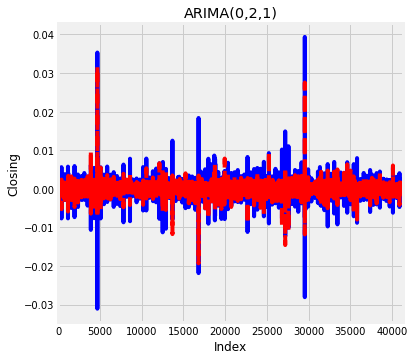

In [43]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
price['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
price['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [23]:
price.shape

(41266, 7)

In [24]:
arima_obj = ARIMA(price['NASDAQ.AAPL'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

/Users/rosmebabyjoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              246334.121
Method:                       css-mle   S.D. of innovations              0.001
Date:                Tue, 26 Nov 2019   AIC                        -492662.242
Time:                        17:57:40   BIC                        -492636.358
Sample:                             2   HQIC                       -492654.061
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.208e-09        nan        nan        nan         nan         nan
ma.L1.D2.y    -0.9988        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0012           +0.0000j            1.0012            0.0000
-----------------------------------------------------------------------------
"""

In [70]:
prediction = arima_obj_fit.forecast()[0]
print('Predicted=%f' % (prediction))

Predicted=5.099751


In [77]:
arima_obj = ARIMA(price['NASDAQ.ADP'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
prediction = arima_obj_fit.forecast()[0]
print('Predicted=%f' % (prediction))
arima_obj_fit.summary()

/Users/rosmebabyjoseph/opt/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted=4.667862


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              241210.860
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sat, 23 Nov 2019   AIC                        -482415.720
Time:                        19:25:20   BIC                        -482389.836
Sample:                             2   HQIC                       -482407.539
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.551e-09   2.11e-08     -0.169      0.866   -4.49e-08    3.78e-08
ma.L1.D2.y    -0.9940      0.002   -438.995      0.000      -0.998      -0.990
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0060           +0.0000j            1.0060            0.0000
-----------------------------------------------------------------------------
"""

In [78]:
arima_obj = ARIMA(price['NASDAQ.CBOE'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
prediction = arima_obj_fit.forecast()[0]
print('Predicted=%f' % (prediction))
arima_obj_fit.summary()

Predicted=4.614015


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              252779.294
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sat, 23 Nov 2019   AIC                        -505552.589
Time:                        19:37:09   BIC                        -505526.705
Sample:                             2   HQIC                       -505544.408
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.945e-10   4.73e-08     -0.013      0.990   -9.34e-08    9.22e-08
ma.L1.D2.y    -0.9818      0.007   -140.846      0.000      -0.996      -0.968
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0185           +0.0000j            1.0185            0.0000
-----------------------------------------------------------------------------
"""

In [79]:
arima_obj = ARIMA(price['NASDAQ.CSCO'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
prediction = arima_obj_fit.forecast()[0]
print('Predicted=%f' % (prediction))
arima_obj_fit.summary()

Predicted=3.472718


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              243089.139
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sat, 23 Nov 2019   AIC                        -486172.278
Time:                        19:37:43   BIC                        -486146.395
Sample:                             2   HQIC                       -486164.097
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.712e-09   9.81e-08     -0.038      0.970   -1.96e-07    1.89e-07
ma.L1.D2.y    -0.9702      0.018    -52.491      0.000      -1.006      -0.934
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0307           +0.0000j            1.0307            0.0000
-----------------------------------------------------------------------------
"""

In [80]:
arima_obj = ARIMA(price['NASDAQ.EBAY'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
prediction = arima_obj_fit.forecast()[0]
print('Predicted=%f' % (prediction))
arima_obj_fit.summary()

/Users/rosmebabyjoseph/opt/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/rosmebabyjoseph/opt/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicted=3.587136


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                41264
Model:                 ARIMA(0, 2, 1)   Log Likelihood              243251.407
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sat, 23 Nov 2019   AIC                        -486496.815
Time:                        19:38:08   BIC                        -486470.932
Sample:                             2   HQIC                       -486488.634
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.474e-09        nan        nan        nan         nan         nan
ma.L1.D2.y    -0.9992        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0008           +0.0000j            1.0008            0.0000
-----------------------------------------------------------------------------
"""